In [3]:
from sklearn.datasets import load_digits
import numpy as np

In [4]:
data = load_digits()

In [5]:
print(data.DESCR) # DESCR есть у всех датасетов в sklearn

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [8]:
X, y = data.data, data.target

In [9]:
X.shape, y.shape

((1797, 64), (1797,))

In [10]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [11]:
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
X[0, :] # значит слайс по нулевой строке и всем столбцам

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

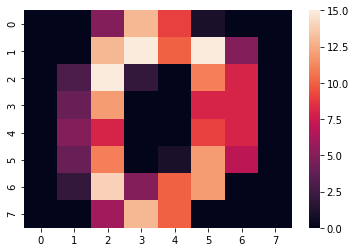

In [15]:
sns.heatmap(X[0, :].reshape(8,8))

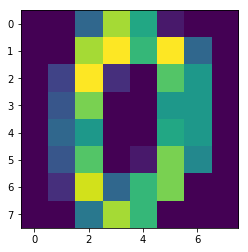

In [16]:
# Тоже самое
plt.imshow(X[0, :].reshape(8,8))

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # stratify старается, чтобы доли каждого класса в обучающей и тестовой выборках были близки

In [20]:
from sklearn.linear_model import LogisticRegression # хоть и называется регрессия, но логистическая регр. всегда решает задачи классификации
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
logit = LogisticRegression()

In [22]:
from sklearn.model_selection import cross_val_score # cross_val_score не подбирает оптимальные параметры, а просто прогоняет по всем

In [23]:
knn_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
print('kNN avg score', np.mean(knn_scores))

kNN avg score 0.985636053873


In [25]:
logit_scores = cross_val_score(logit, X_train, y_train, scoring='accuracy', cv=5)
print('LogReg avg score', np.mean(logit_scores))

LogReg avg score 0.953001682761


In [27]:
knn.fit(X_train, y_train)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
knn.predict([X_valid[0, :]])

array([1])

In [31]:
logit.predict([X_valid[0, :]])

array([1])

In [32]:
knn_predict = knn.predict(X_valid)

In [33]:
logit_predict = logit.predict(X_valid)

In [35]:
logit_errors = np.where(logit_predict != y_valid)[0] # where возвращает кортеж, нам нужен первый элемент
knn_errors = np.where(knn_predict != y_valid)[0]

In [36]:
len(logit_errors), len(knn_errors)

(29, 11)

In [37]:
logit_errors[0]

32

(<matplotlib.image.AxesImage at 0x19f4184f7b8>, 7)

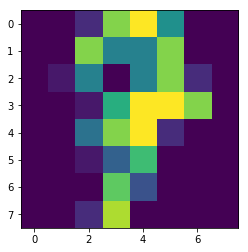

In [38]:
plt.imshow(X_valid[32, :].reshape(8,8)), y_valid[32]

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import pandas as pd

In [44]:
pd.DataFrame(confusion_matrix(y_valid, knn_predict), \
            index=['true_%d' % i for i in range(10)], \
            columns=['pred_%d' % i for i in range(10)]) # правильные по строкам, предсказанные по столбцам

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,54,0,0,0,0,0,0,0,0,0
true_1,0,55,0,0,0,0,0,0,0,0
true_2,0,1,52,0,0,0,0,0,0,0
true_3,0,0,0,52,0,1,0,1,1,0
true_4,0,1,0,0,52,0,0,0,1,0
true_5,0,0,0,0,0,55,0,0,0,0
true_6,0,0,0,0,0,0,54,0,0,0
true_7,0,0,0,0,0,0,0,54,0,0
true_8,0,2,0,1,0,0,0,0,49,0
true_9,0,0,0,1,0,1,0,0,0,52


In [50]:
nn = np.arange(1,11)
scores = []

for n in nn:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=n), X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs распараллеливание по ядрам процессора
    print(n, np.mean(score), sep='\t')
    scores.append(np.mean(score))

1	0.984835904747
2	0.98319526994
3	0.980860702467
4	0.984010650999
5	0.985636053873
6	0.983222975296
7	0.983210729044
8	0.981623202467
9	0.98160109049
10	0.97840713821


Text(0.5,1,'Accuracy of kNN')

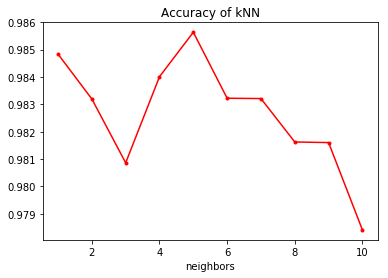

In [47]:
plt.plot(nn, scores, 'r.-')
plt.xlabel('neighbors')
plt.title('Accuracy of kNN')

In [49]:
nn[np.argmax(scores)] # выбираем параметр с максимальным значением score

5